In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential,load_model
from keras.layers import Dense,Activation
from sklearn.decomposition import PCA
from keras.utils import np_utils

In [2]:
x = pd.read_csv("MNIST.csv")
X_ = np.array(x)

X = X_[:,1:]
X = X/255.0
y = X_[:,0]

print X.shape,y.shape

(42000, 784) (42000,)


In [3]:
X = X.reshape((X.shape[0],28,28,1))
print X.shape

(42000, 28, 28, 1)


In [4]:
encoder = load_model('enc_64d.h5')
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 8)         1160      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                73792     
Total para

/usr/local/lib/python2.7/dist-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [6]:
X_train = encoder.predict(X)
Y_train = np_utils.to_categorical(y)
print X_train.shape,Y_train.shape

(42000, 64) (42000, 10)


In [7]:
model = Sequential()
model.add(Dense(16, input_shape=(64,)))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
hist = model.fit(X_train,Y_train,
                 epochs = 20,
                 shuffle=True,
                 batch_size=256,
                 validation_split=0.20)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 2s 57us/step - loss: 1.9694 - acc: 0.3267 - val_loss: 1.5095 - val_acc: 0.5929
Epoch 2/20
33600/33600 [==============================] - 1s 39us/step - loss: 1.2289 - acc: 0.6973 - val_loss: 0.9629 - val_acc: 0.7831
Epoch 3/20
33600/33600 [==============================] - 1s 40us/step - loss: 0.8204 - acc: 0.8092 - val_loss: 0.6763 - val_acc: 0.8393
Epoch 4/20
33600/33600 [==============================] - 1s 41us/step - loss: 0.6134 - acc: 0.8492 - val_loss: 0.5355 - val_acc: 0.8680
Epoch 5/20
33600/33600 [==============================] - 1s 19us/step - loss: 0.5077 - acc: 0.8677 - val_loss: 0.4596 - val_acc: 0.8814
Epoch 6/20
33600/33600 [==============================] - 1s 22us/step - loss: 0.4476 - acc: 0.8805 - val_loss: 0.4167 - val_acc: 0.8882
Epoch 7/20
33600/33600 [==============================] - 1s 22us/step - loss: 0.4104 - acc: 0.8877 - val_loss: 0.3852 - val_acc:

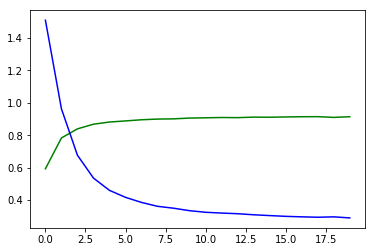

In [10]:
plt.figure(0)
plt.plot(hist.history['val_acc'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.show()